## พลอตแผนที่ relative vorticity  ในช่วงพายุนาลแก 2554
* กระแสอากาศที่มีการยกตัวและจมตัว สามารถใช้แนวคิดของ vorticity มาช่วยในการพิจารณาได้ หากกล่าวถึง vorticity เสมือนกับว่ามีแกนการหมุนของอากาศอยู่ในพื้นที่ หรือให้จินตนาการถึงการหมุนของกระแสอากาศ
    * หากค่า vorticity เป็นลบ แสดงว่ามีกระแสอากาศที่จมตัว
    * หากค่า voriticty เป็นบวก แสดงว่ามีกระแสอากาศลอยตัวหรือยกตัวเกิดขึ้น
* ในกรณีของพายุหมุนเขตร้อน มักนำมาเป็นตัวอย่างของกรณี voritcity ได้ ซึ่งบริเวณรอบๆ ใจกลางพายุ จะพบว่าค่า vorticity จะมีค่าเป็นบวก เนื่องจากมีกระแสอากาศที่เกิดการยกตัวรอบๆ ตาพายุ หรือ รอบๆ vortex 
* ในกรณีที่พายุเคลื่อนตัวเข้ามายังพื้นแผ่นดิน จะพบว่าพายุจะอ่อนกำลังลง เนื่องจากไม่มีพลังงานที่จะป้อนพลังให้กับพายุ เนื่องจากพื้นแผ่นดินไม่มีความชื้นเหมือนดั่งพื้นน้ำในมหาสมุทร ความร้อนแฝงที่เกิดจากการกลั่นตัวของไอน้ำในอากาศรอบๆ ตาพายุจึงไม่มีโอกาสเกิดขึ้น ดังนั้นแนวคิด vorticity จึงนำมาช่วยติดตาม vortex ที่เกิดขึ้นในช่วงที่พายุเดินทางมาสลายตัวในพื้นแผ่นดิน เช่นในตอนกลางของประเทศไทย เป็นต้น นิสิตสามารถค้นคว้าหางานวิจัยในเรื่องนี้ได้ มีผู้ศึกษาเป็นชาวญี่ปุ่น Prof.Satomura แห่ง Kyoto university

### แนะนำให้อ่านเพิ่มเติม
* พื้นฐานแนวคิด vorticity https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/vorticity/vorticity.html
* โค้ดในการคำนวณ absolute vorticity จากข้อมูลลม u-v component  https://unidata.github.io/python-gallery/examples/500hPa_Absolute_Vorticity_winds.html

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
import numpy as np
import xarray as xr
import metpy.calc as mpcalc
%matplotlib inline

## 1.อ่านและเก็บค่าตัวแปรจากข้อมูล ERA5

In [2]:
ds = xr.open_dataset('era5_daily_2_5oct_2011_globe.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8, time: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05
Data variables:
    d          (time, level, latitude, longitude) float32 ...
    z          (time, level, latitude, longitude) float32 ...
    r          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
    u          (time, level, latitude, longitude) float32 ...
    v          (time, level, latitude, longitude) float32 ...
    vo         (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

In [3]:
ds.coords

Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
  * time       (time) datetime64[ns] 2011-10-02 2011-10-03 2011-10-04 2011-10-05

In [4]:
ds = ds.sel(time='2011-10-02')

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, level: 8)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 200 250 300 500 700 850 925 1000
    time       datetime64[ns] 2011-10-02
Data variables:
    d          (level, latitude, longitude) float32 ...
    z          (level, latitude, longitude) float32 ...
    r          (level, latitude, longitude) float32 ...
    q          (level, latitude, longitude) float32 ...
    t          (level, latitude, longitude) float32 ...
    u          (level, latitude, longitude) float32 ...
    v          (level, latitude, longitude) float32 ...
    vo         (level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-04-16 09:15:12 GMT by grib_to_netcdf-2.24.3: /opt/ecmw...

### 2.เลือกข้อมูลและเลือกพื้นที่ศึกษาอินโดจีนและบริเวณโดยรอบ

In [8]:
# เลือกพื้นที่ที่ต้องการจากข้อมูลทั้งหมด เพื่อลดการคำนวณ
lon_slice = slice(75, 125)
lat_slice = slice(35, 0)

# เก็บตัวแปร lat/lon values 
lats = ds.latitude.sel(latitude=lat_slice).values
lons = ds.longitude.sel(longitude=lon_slice).values

# เซตค่าระดับความกดอากาศที่ต้องการวิเคราะห์
level = 500

# เซตค่าตัวแปรที่ต้องการพลอต
hght_500 = ds.z.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
hght_500 = hght_500 / 9.80665  #9.80665 m/s**2  แปลงค่า geopotential ไปเป็น geopotential height ในระดับความสูงเหนือ geoid

avor_500 = ds.vo.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
uwnd_er = ds.u.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array
vwnd_er = ds.v.metpy.sel(
    vertical=level, latitude=lat_slice, longitude=lon_slice).squeeze().metpy.unit_array


# เก็บค่าตัวแปรเวลาของข้อมูล
vtime = ds.time.data.astype('datetime64[ms]').astype('O')

## 3.พลอตแผนที่ 

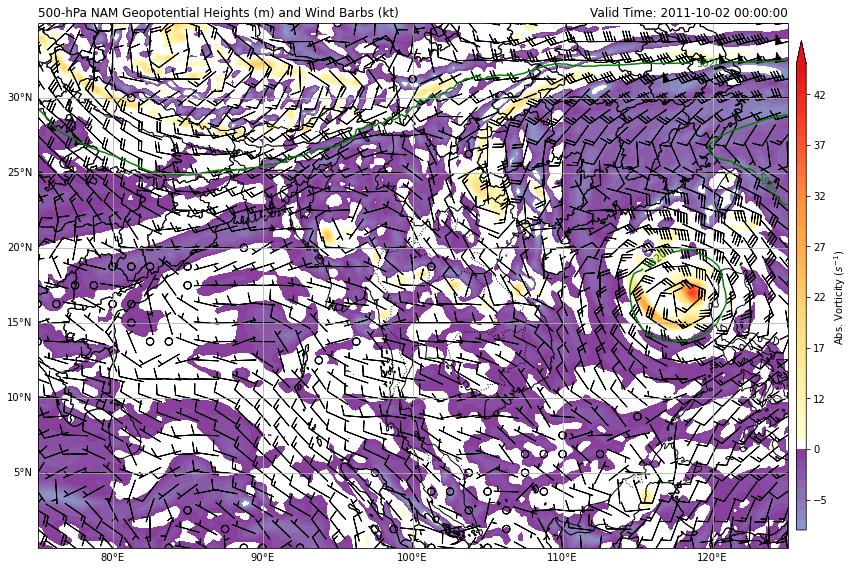

In [13]:
# กำหนดค่าเส้นโครงแผนที่
mapcrs = ccrs.PlateCarree(central_longitude=100)

# กำหนดค่าเส้นโครงแผนที่ของข้อมูล
datacrs = ccrs.PlateCarree()

# ตั้งค่ารูปภาพ figure และสร้าง plot axes ด้วยการกำหนดเส้นโครงแผนที่
fig = plt.figure(1, figsize=(16, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([75, 125, 0, 35], ccrs.PlateCarree())

# เพิ่มขอบเขตการปกครอง
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.BORDERS, linestyle=':') #เพิ่มขอบเขตประเทศจาก cartopy

# ค่า relative Vorticity colors
# Use two different colormaps from matplotlib and combine into one color set
clevs_500_avor = list(range(-8, 1, 1))+list(range(8, 46, 1))
colors1 = plt.cm.YlOrRd(np.linspace(0, 1, 48))
colors2 = plt.cm.BuPu(np.linspace(0.5, 0.75, 8))
colors = np.vstack((colors2, (1, 1, 1, 1), colors1))

# พลอตค่า relative vorticity values (คูณด้วย by 10^5 to scale appropriately)
cf = ax.contourf(lons, lats, avor_500*1e5, clevs_500_avor, colors=colors, extend='max',
                 transform=datacrs)
cb = plt.colorbar(cf, orientation='vertical', pad=0.01, aspect=50, shrink=0.75)
cb.set_label('Relative Vorticity ($s^{-1}$)')

# พลอตเส้นชั้นเท่าของ 500-hPa geopotential heights ในหน่วย meters
clevs_500_hght = np.arange(0, 8000, 20)
cs = ax.contour(lons, lats, hght_500, clevs_500_hght, colors='green', transform=datacrs)
plt.clabel(cs, fmt='%d')

# พลอต wind barbs ทุกๆ 5 กริด เนื่องจากกริดละเอียดมาก
wind_slice = (slice(None, None, 5), slice(None, None, 5))
ax.barbs(lons[wind_slice[0]], lats[wind_slice[1]],
         uwnd_er[wind_slice[0], wind_slice[1]].to('kt').m, 
         vwnd_er[wind_slice[0], wind_slice[1]].to('kt').m,
         pivot='middle', color='black', transform=datacrs)

#เซตค่าชื่อกริด การแสดงกริดเส้นโครง
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# ใส่ชื่อและข้อมูลของภาพ
plt.title('500-hPa ERA5 Geopotential Heights (m)'
          ' and Wind Barbs (kt)', loc='left')
plt.title('Valid Time: {}'.format(vtime), loc='right')

plt.show()


### งานมอบหมายนิสิต
1. ให้พลอตแผนที่ดังโค้ดตัวอย่างนี้ ของวันที่ 3-5 ตุลาคม ค.ศ. 2011 แล้วให้นิสิตวิเคราะห์ค่า vorticity ในเชิงพื้นที่และเชิงห้วงเวลาด้วยการเขียนบรรยาย
2. ให้นิสิตอ่าน  อ่าน http://tiwrmdev.hii.or.th/current/menu.html ซึ่งเป็นบทสรุปสถานการณ์มหาอุทกภัยในปี 2554 แล้วให้นิสิตทำการดาวน์โหลดข้อมูล ERA5 ของพายุเนสาด หรือ พายุนกเตน ที่นิสิตสนใจ แล้วนำมาพลอตเพื่อหาค่าความผันแปรของค่า vorticity เชิงพื้นที่และเชิงห้วงเวลา แล้วทำการเขียนบรรยายความผันแปรเชิงห้วงเวลาและเชิงพื้นที่ของพายุดังกล่าว ดาวน์โหลด ข้อมูล ERA5 daily จาก https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview